#### Job Satisfaction

In this notebook, you will be exploring job satisfaction according to the survey results.  Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

In [1]:
import pandas as pd
import numpy as np
import JobSatisfaction as t
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns.tolist()

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [3]:
df['JobSatisfaction'].isna().sum()

3849

In [4]:
df['JobSatisfaction'].value_counts().sum()

15253

In [5]:
df['JobSatisfaction'].isna().sum() / df['JobSatisfaction'].value_counts().sum()

0.25234380121943223

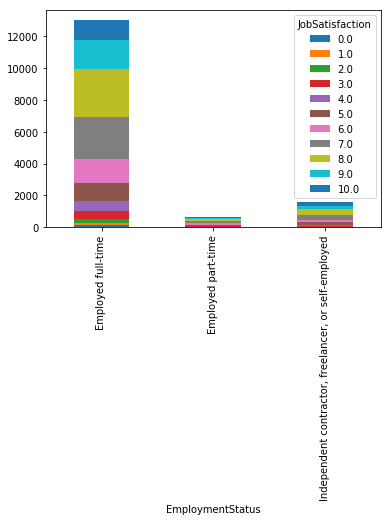

In [7]:
pd.crosstab(df['EmploymentStatus'],df['JobSatisfaction']).plot(kind='bar', stacked=True)

In [9]:
df['CompanySize'].value_counts()

20 to 99 employees          3214
100 to 499 employees        2858
10,000 or more employees    1998
10 to 19 employees          1544
1,000 to 4,999 employees    1482
Fewer than 10 employees     1456
500 to 999 employees         946
5,000 to 9,999 employees     606
I don't know                 311
I prefer not to answer       238
Name: CompanySize, dtype: int64

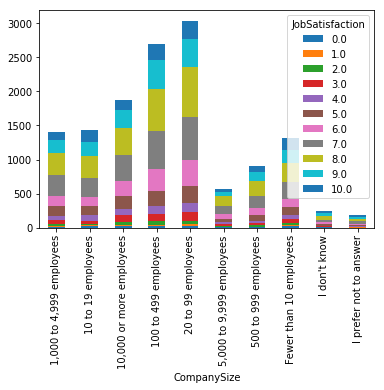

In [10]:
pd.crosstab(df['CompanySize'],df['JobSatisfaction']).plot(kind='bar', stacked=True)

#### Question 1

**1.** Use the space above to assist in matching each variable (a, b, c, d, e, f, g, or h) as the appropriate key that describes the value in the **job_sol_1** dictionary.

In [12]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d, 
             'In general, do smaller companies appear to have employees with higher job satisfaction?': h}
             
t.jobsat_check1(job_sol_1)

Looking at the average job satisfaction for each group within CompanySize, and sorting using sort_values(), there is a bit of trend don't you think?  Maybe not significant, but still an intriguing trend!


#### Question 2

**2.** Use the space above to assist in matching each variable (a, b, c) as the appropriate key that describes the value in the **job_sol_2** dictionary. Notice you can have the same letter appear more than once.

In [16]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': a,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a, 
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}
             
t.jobsat_check2(job_sol_2)

Nice job! That's what we found as well!


End of Notebook